In [ ]:
!pip install qrcode[pil] matplotlib numpy pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.3 MB/s eta 0:00:00


Enter the path to your QR code image file: /content/drive/MyDrive/qr_dataset/1002-v3.png


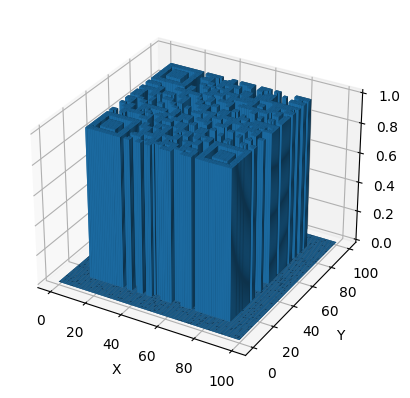

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image, UnidentifiedImageError

# Function to convert 2D QR code image to 3D plot
def qr_code_to_3d(qr_image_path):
    try:
        # Open the image provided by the user
        img = Image.open(qr_image_path).convert('L')  # Convert to grayscale
        img = img.resize((100, 100))  # Resize for better 3D plotting if needed
        qr_array = np.array(img)

        # Threshold the image to binary (QR codes are black and white)
        threshold = 128
        qr_array = np.where(qr_array < threshold, 1, 0)  # Black becomes 1, white becomes 0

        # Set up 3D plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Get the dimensions of the image
        x_len, y_len = qr_array.shape
        x = np.arange(0, x_len, 1)
        y = np.arange(0, y_len, 1)
        x, y = np.meshgrid(x, y)

        z = np.zeros_like(x)

        # Use the QR code pixel values to determine height of each pixel (extrusion in 3D)
        for i in range(x_len):
            for j in range(y_len):
                z[i, j] = 1 if qr_array[i, j] == 1 else 0  # Extrude only black regions

        # Plot the 3D QR code
        ax.bar3d(x.ravel(), y.ravel(), z.ravel() * 0, 1, 1, z.ravel(), shade=True)

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        plt.show()

    except UnidentifiedImageError:
        print("Error: Could not identify the image file. Please make sure the file is a valid image.")
    except FileNotFoundError:
        print("Error: File not found. Please check the file path.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Get the QR code file from the user
qr_image_path = input("Enter the path to your QR code image file: ")
qr_code_to_3d(qr_image_path)


In [1]:
 !pip install qrcode[pil]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 1.7 MB/s eta 0:00:00


Enter the data for the QR code (e.g., URL, text): /content/drive/MyDrive/qr_dataset/1011-v1.png
Enter the path to save the QR code image (e.g., 'qr_code_example.png'): 1.png


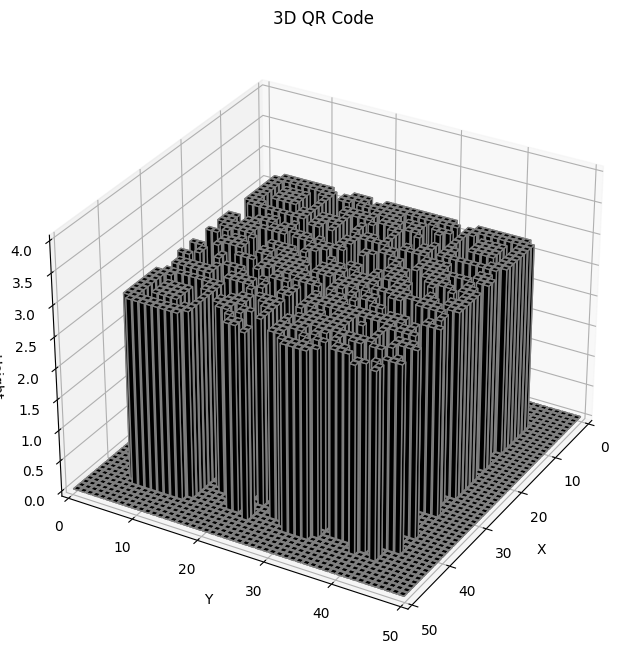

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image, UnidentifiedImageError
import qrcode


# Function to generate the QR code and save it
def generate_qr_code(data, qr_image_path):
    qr = qrcode.QRCode(
        version=1,  # Controls the size of the QR code
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )
    qr.add_data(data)
    qr.make(fit=True)

    img = qr.make_image(fill='black', back_color='white')
    img.save(qr_image_path)


# Function to convert 2D QR code to 3D extrusion
def qr_code_to_3d(qr_image_path):
    try:
        # Open the image and convert to grayscale
        img = Image.open(qr_image_path).convert('L')  # Convert to grayscale
        img = img.resize((50, 50))  # Resize for better visualization
        qr_array = np.array(img)

        # Threshold the image to binary (QR codes are black and white)
        threshold = 128
        qr_array = np.where(qr_array < threshold, 1, 0)  # Black becomes 1, white becomes 0

        # Set up 3D plot
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Get the dimensions of the image
        x_len, y_len = qr_array.shape
        x = np.arange(0, x_len, 1)
        y = np.arange(0, y_len, 1)
        x, y = np.meshgrid(x, y)

        # Create Z values for the QR code
        z = np.zeros_like(x)

        # Define height for the black regions
        heights = np.zeros_like(qr_array, dtype=float)
        heights[qr_array == 1] = 3  # Set height of 3 for black pixels

        # Plot the 3D blocks
        ax.bar3d(x.ravel(), y.ravel(), z.ravel(), 0.8, 0.8, heights.ravel(), color='black', edgecolor='gray', shade=True)

        # Set labels and limits
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Height')
        ax.set_title('3D QR Code')

        # Set limits to make the blocks more visible
        ax.set_xlim(0, x_len)
        ax.set_ylim(0, y_len)
        ax.set_zlim(0, 4)  # Set z limits to enhance visibility

        # View angle for better visibility
        ax.view_init(elev=30, azim=30)

        plt.show()

    except UnidentifiedImageError:
        print("Error: Could not identify the image file. Please make sure the file is a valid image.")
    except FileNotFoundError:
        print("Error: File not found. Please check the file path.")
    except Exception as e:
        print(f"An error occurred: {e}")


# Take input from the user
data = input("Enter the data for the QR code (e.g., URL, text): ")
qr_image_path = input("Enter the path to save the QR code image (e.g., 'qr_code_example.png'): ")

# Generate a QR code based on user input
generate_qr_code(data, qr_image_path)

# Convert the QR code to a 3D plot based on user input
qr_code_to_3d(qr_image_path)


Enter the URL or data for the QR code: /content/drive/MyDrive/qr_dataset/1011-v1.png


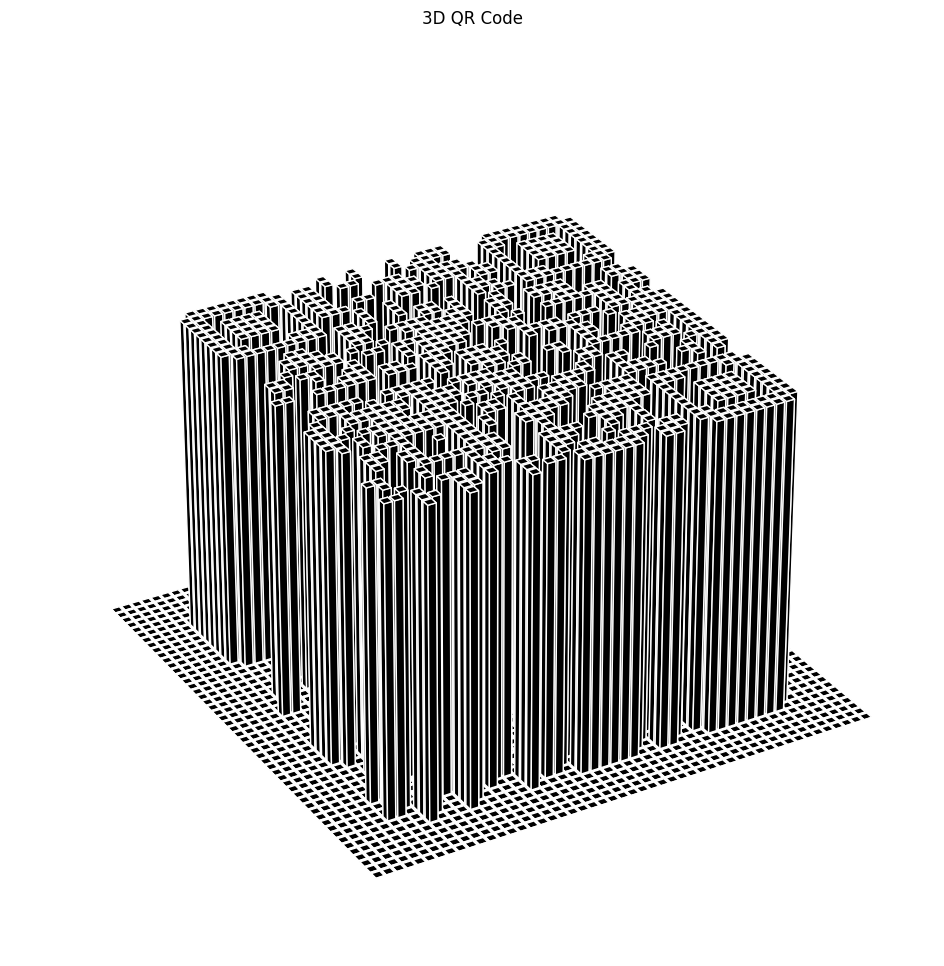

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image, UnidentifiedImageError
import qrcode

# Function to generate the QR code and save it
def generate_qr_code(data, qr_image_path):
    qr = qrcode.QRCode(
        version=1,  # Controls the size of the QR code
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )
    qr.add_data(data)
    qr.make(fit=True)

    img = qr.make_image(fill='black', back_color='white')
    img.save(qr_image_path)

# Function to convert 2D QR code image to 3D plot
def qr_code_to_3d(qr_image_path):
    try:
        # Open the image provided by the user
        img = Image.open(qr_image_path).convert('L')  # Convert to grayscale
        img = img.resize((50, 50))  # Resize for better visualization
        qr_array = np.array(img)

        # Threshold the image to binary (QR codes are black and white)
        threshold = 128
        qr_array = np.where(qr_array < threshold, 1, 0)  # Black becomes 1, white becomes 0

        # Set up 3D plot
        fig = plt.figure(figsize=(12, 12))  # Make plot larger for better visibility
        ax = fig.add_subplot(111, projection='3d')

        # Get the dimensions of the image
        x_len, y_len = qr_array.shape
        x = np.arange(0, x_len, 1)
        y = np.arange(0, y_len, 1)
        x, y = np.meshgrid(x, y)

        # Create Z values for the QR code
        z = np.zeros_like(x)

        # Define height for the black regions
        heights = np.zeros_like(qr_array, dtype=float)
        heights[qr_array == 1] = 5  # Set height of 5 for black pixels (higher for better visibility)

        # Plot the 3D blocks with contrasting colors
        ax.bar3d(x.ravel(), y.ravel(), z.ravel(), 0.8, 0.8, heights.ravel(), color='black', edgecolor='white', shade=True)

        # Set labels and limits
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Height')
        ax.set_title('3D QR Code')

        # Set limits to make the blocks more visible
        ax.set_xlim(0, x_len)
        ax.set_ylim(0, y_len)
        ax.set_zlim(0, 6)  # Set z limits to enhance visibility

        # View angle for better visibility
        ax.view_init(elev=30, azim=60)  # Changed the view angle for better 3D visualization

        # Disable grid for better visibility
        ax.grid(False)

        # Hide axes for a clean look
        ax.axis('off')

        plt.show()

    except UnidentifiedImageError:
        print("Error: Could not identify the image file. Please make sure the file is a valid image.")
    except FileNotFoundError:
        print("Error: File not found. Please check the file path.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Main program
if __name__ == "__main__":
    # Get input from the user for the URL and the file path
    qr_data = input("Enter the URL or data for the QR code: ")
    qr_image_path = "scannable_qr_code.png"

    # Generate a scannable QR code
    generate_qr_code(qr_data, qr_image_path)

    # Convert the 2D QR code into a 3D representation
    qr_code_to_3d(qr_image_path)
